# Regression Analysis of Spending on Appearance

## 1. Introduction

The dataset that was used for this analysis contains 1010 rows of individuals’ preferences and demographic characteristics. The primary focus of this analysis is to identify factors that influence individuals’ spending patterns and to develop an accurate predictive model. The main hypothesis is that women spend more money on appearance than men. The report demonstrates the results of correlation analysis, simple linear regression, and multiple linear regression.

### Key Results
- A weak positive correlation (0.12) between gender and spending on appearance 
- Women spend slightly more on appearance than men (+0.3 points on a 1–5 scale)

- Simple linear regression achieved R² = 0.015 (gender alone has low explanatory power)
- Multiple regression improved model performance (R² = 0.276)

- Shopping interest is the strongest predictor of spending on appearance

## 2. Dataset

The data used in this project was obtained from the survey of students in the Statistics class at FSEV UK University in Slovakia and their friends.

In [ ]:
import pandas as pd

dataset = pd.read_csv('archive/responses.csv')

The dataset consists of 1010 rows and 150 columns (139 integers and 11 categorical variables). Integers are answers to questions on a scale 1-5 (e.g. Strongly disagree 1-2-3-4-5 Strongly agree (integer), where 1 means Strongly disagree and 5 means Strongly agree).

In [4]:
dataset.shape

(1010, 150)

The variables can be split into the following groups:

- Music preferences (19 items)

- Movie preferences (12 items)

- Hobbies & interests (32 items)

- Phobias (10 items)

- Health habits (3 items)

- Personality traits, views on life, & opinions (57 items)

- Spending habits (7 items)

- Demographics (10 items)

In [5]:
dataset.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)

All participants were of Slovakian nationality, aged between 15 and 30, with an average age of 20 years old.

In [6]:
dataset['Age'].describe()

count    1003.000000
mean       20.433699
std         2.828840
min        15.000000
25%        19.000000
50%        20.000000
75%        22.000000
max        30.000000
Name: Age, dtype: float64

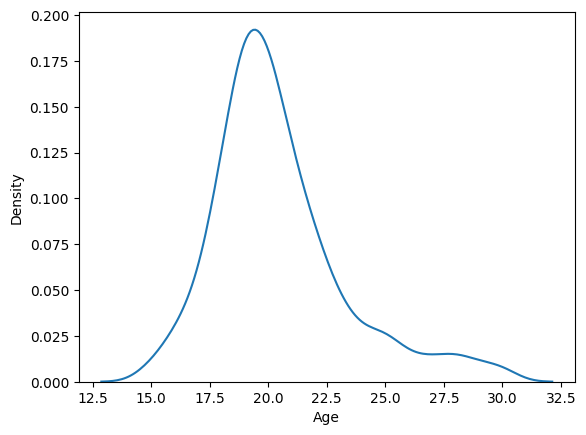

In [ ]:
import seaborn as sns

sns.kdeplot(data=dataset, x=dataset['Age']);

## 3. Analysis

To check the main hypothesis that women spend more money on appearance, I used the data from the survey about spending money on appearance (which is identified by the scale 1-5, where 1 means Strongly disagree and 5 means Strongly agree) and information about the gender of participants.


In [8]:
spend_on_looks = dataset['Spending on looks']
spend_on_looks.value_counts(dropna=False).sort_index(), spend_on_looks.count()

(Spending on looks
 1.0    111
 2.0    206
 3.0    299
 4.0    247
 5.0    144
 NaN      3
 Name: count, dtype: int64,
 np.int64(1007))

In [9]:
gender = dataset['Gender']
gender.value_counts(dropna=False).sort_index(), gender.count()

(Gender
 female    593
 male      411
 NaN         6
 Name: count, dtype: int64,
 np.int64(1004))

I dropped the rows that have missing values for the variables we will need.

In [10]:
spend_on_looks_and_gender_clean = dataset.dropna(subset=['Spending on looks','Gender'])
spend_on_looks_and_gender_clean.shape

(1001, 150)

Here is a distribution of respondents by answers and the distribution of respondents by gender. We see that the most popular answer to the question is 3 (on a scale 1-5), and we have more female respondents than male respondents.

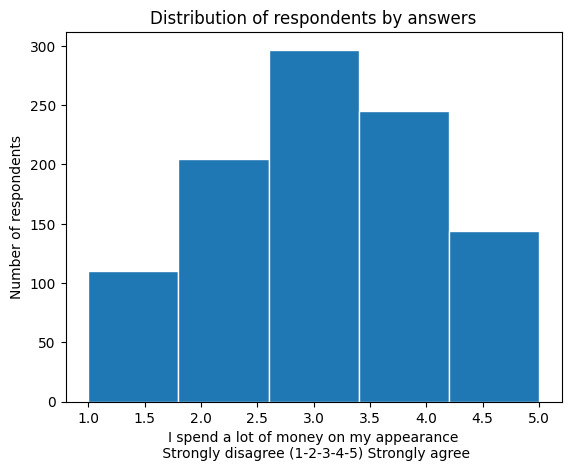

In [ ]:
import matplotlib.pyplot as plt

spend_on_looks_and_gender_clean['Spending on looks'].hist(bins=5, grid=False,edgecolor='white')

plt.xlabel('I spend a lot of money on my appearance\n Strongly disagree (1-2-3-4-5) Strongly agree')
plt.ylabel('Number of respondents')
plt.title('Distribution of respondents by answers');

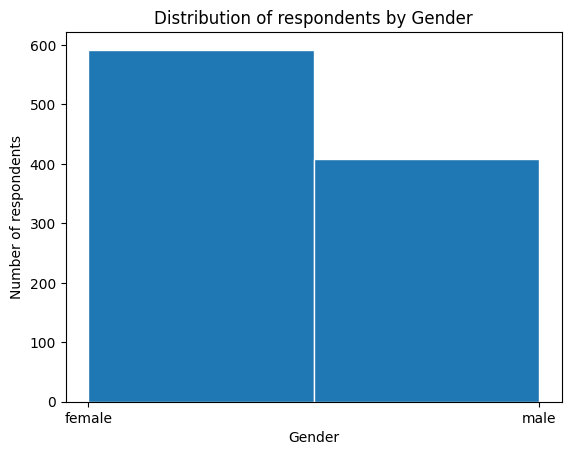

In [12]:
spend_on_looks_and_gender_clean['Gender'].hist(bins=2, grid=False,edgecolor='white')

plt.xlabel('Gender')
plt.ylabel('Number of respondents')
plt.title('Distribution of respondents by Gender');

Here is the box plot of answers by gender.

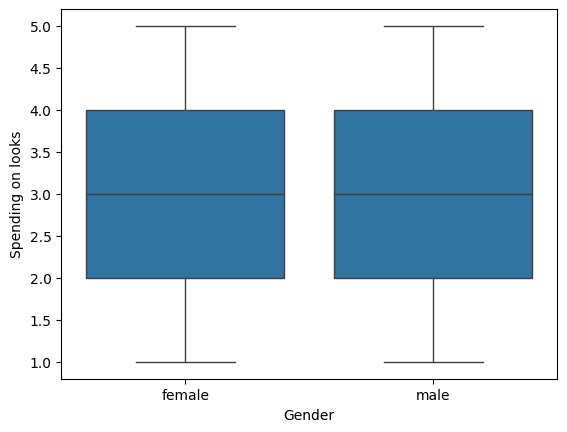

In [13]:
sns.boxplot(x='Gender', y='Spending on looks', data = spend_on_looks_and_gender_clean);

I prepared data for further analysis by replacing «male» and «female» with 1 and 2, respectively. So 1 means «male» and 2 means «female».

In [14]:
# replacing data in Gender column (male = 1, female = 2)
gender_clean = spend_on_looks_and_gender_clean['Gender'].replace(['male','female'], [1,2])

gender_clean.value_counts().sort_index(), gender_clean.shape

/var/folders/zw/3vg0v1k53nng39_7vx4krjrr0000gn/T/ipykernel_685/1455807322.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_clean = spend_on_looks_and_gender_clean['Gender'].replace(['male','female'], [1,2])


(Gender
 1    409
 2    592
 Name: count, dtype: int64,
 (1001,))

In [15]:
spend_on_looks_clean = spend_on_looks_and_gender_clean['Spending on looks']
spend_on_looks_clean.value_counts().sort_index(), spend_on_looks_clean.shape

(Spending on looks
 1.0    110
 2.0    205
 3.0    297
 4.0    245
 5.0    144
 Name: count, dtype: int64,
 (1001,))

The correlation coefficient between spending money on appearance and gender equals 0.12. It means that the variables have a weak positive correlation. 

In [ ]:
import numpy as np

np.corrcoef(spend_on_looks_clean, gender_clean)[0,1]

np.float64(0.12329439980006096)

### 3.1. Simple regression

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.iolib.table import SimpleTable

def display_summary(result):
    """Prints summary statistics from a regression model.

    result: RegressionResults object
    """
    params = result.summary().tables[1]
    display(params)

    if hasattr(result, "rsquared"):
        row = ["R-squared:", f"{result.rsquared:0.4}"]
    elif hasattr(result, "prsquared"):
        row = ["Pseudo R-squared:", f"{result.prsquared:0.4}"]
    else:
        return
    table = SimpleTable([row])
    display(table)

Now I checked whether I can use this relation to predict spending habits. I computed simple linear regression between the dependent variable (spending money on appearance) and the independent variable (gender). 

In [ ]:
# simple regression
# formula = 'dependent ~ independent variable'

formula = 'spend_on_looks_clean ~ gender_clean'
simple_regression = smf.ols(formula, data=spend_on_looks_and_gender_clean).fit()

The results of simple regression:
- The **slope** equals 0.30. When gender increases by 1 (from 1 to 2, from male to female), the spending on looks increases by 0.30 points on a 1-5 scale. It means that women’s answers on the question about spending on looks are greater but don’t differ much from men’s.
- The **p-values** for intercept and slope are small, which means that the observed effect does not happen by chance. 
- The **R-squared** value (coefficient of determination) indicates how much of the variation in the dependent variable can be explained by the independent variable(s).
In this model, R-squared is 0.015, meaning that we can reduce errors only by about 1.5% if we use gender to predict spendings on appearance.

In [ ]:
display_summary(simple_regression)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.6268,0.128,20.485,0.000,2.375,2.878
gender_clean,0.3023,0.077,3.927,0.000,0.151,0.453


R-squared:,0.0152


So, as a result, we have a small difference in spending on looks between women and men, a weak positive correlation equals 0.12, and an R-squared value that equals 0.015. It means that we have a small relationship between gender and spending habits, but the practical impact is small even though the result is statistically significant. Gender alone doesn’t explain people’s spending habits. To make better predictions, I included additional variables and computed multiple linear regression.

### 3.2. Multiple regression

For multiple regression, I used:
- The dependent variable (spending money on appearance)
- The independent variables:
    - Gender of participants
    - Age of participants
    - Socializing interest (Socializing: Not interested 1-2-3-4-5 Very interested (integer))
    - Shopping interest (Shopping: Not interested 1-2-3-4-5 Very interested (integer))

In [19]:
dataset['Age'].value_counts(dropna=False).sort_index()

Age
15.0     11
16.0     29
17.0     53
18.0    123
19.0    210
20.0    194
21.0    127
22.0     84
23.0     47
24.0     28
25.0     30
26.0     15
27.0     14
28.0     17
29.0     11
30.0     10
NaN       7
Name: count, dtype: int64

In [20]:
# HOBBIES & INTERESTS
# Socializing: Not interested 1-2-3-4-5 Very interested (integer)
dataset['Socializing'].value_counts(dropna=False).sort_index()

Socializing
1.0     74
2.0    183
3.0    386
4.0    234
5.0    128
NaN      5
Name: count, dtype: int64

In [21]:
# HOBBIES & INTERESTS
# Shopping: Not interested 1-2-3-4-5 Very interested (integer)
dataset['Shopping'].value_counts(dropna=False).sort_index()

Shopping
1.0    103
2.0    197
3.0    252
4.0    230
5.0    226
NaN      2
Name: count, dtype: int64

I dropped the rows that have missing values for the variables we will need.

In [22]:
data_set_5_categor_clean = dataset.dropna(subset=['Spending on looks','Gender','Age','Shopping','Socializing'])
data_set_5_categor_clean.shape

(989, 150)

I prepared data for future analysis by replacing «male» and «female» with 1 and 2, respectively. So 1 means «male» and 2 means «female».

In [ ]:
# replacing data in Gender column (male = 1, female = 2)
data_set_5_categor_clean['Gender'] = data_set_5_categor_clean['Gender'].replace(['male','female'], [1,2])
data_set_5_categor_clean['Gender'].value_counts().sort_index(), data_set_5_categor_clean['Gender'].shape

/var/folders/zw/3vg0v1k53nng39_7vx4krjrr0000gn/T/ipykernel_685/1536898612.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set_5_categor_clean['Gender']  = data_set_5_categor_clean['Gender'].replace(['male','female'], [1,2])
/var/folders/zw/3vg0v1k53nng39_7vx4krjrr0000gn/T/ipykernel_685/1536898612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_5_categor_clean['Gender']  = data_set_5_categor_clean['Gender'].replace(['male','female'], [1,2])


(Gender
 1    402
 2    587
 Name: count, dtype: int64,
 (989,))

The correlation coefficients are demonstrated on the table and on the heat map. 
- The strongest positive correlation is between spending on looks and shopping interest, which equals 0.51.
- The moderate positive correlation between shopping interest and gender, which equals 0.4.
- Other coefficients are either weak positive (e.g. between spending on looks and gender or socializing) or weak negative (e.g. between age and spending on looks/shopping interest).


In [24]:
columns_5 = ['Spending on looks','Gender','Age','Shopping','Socializing']
subset_5 = data_set_5_categor_clean[columns_5]
print(round(subset_5.corr(), 2))

                   Spending on looks  Gender   Age  Shopping  Socializing
Spending on looks               1.00    0.12 -0.07      0.51         0.16
Gender                          0.12    1.00 -0.13      0.40         0.01
Age                            -0.07   -0.13  1.00     -0.10        -0.02
Shopping                        0.51    0.40 -0.10      1.00         0.15
Socializing                     0.16    0.01 -0.02      0.15         1.00


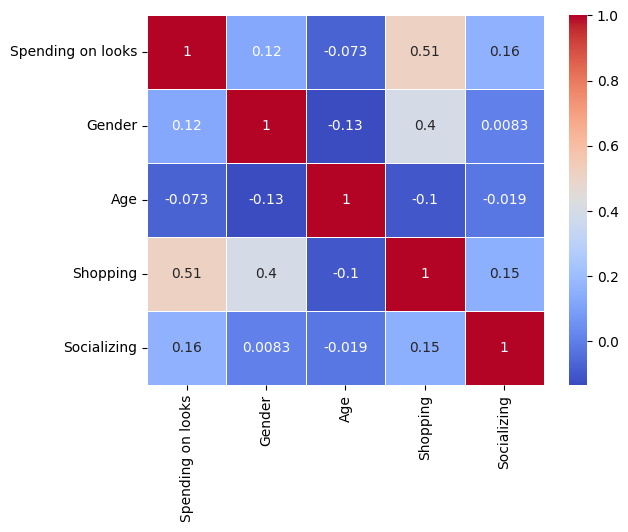

In [25]:
sns.heatmap(subset_5.corr(), annot=True, cmap='coolwarm', linewidth=0.5);

Here I computed multiple regression with these variables.

In [26]:
spend_on_looks_clean_5 = data_set_5_categor_clean['Spending on looks']
gender_clean_5 = data_set_5_categor_clean['Gender']
age_clean_5 = data_set_5_categor_clean['Age']
shopping_clean_5 = data_set_5_categor_clean['Shopping']
socializing_clean_5 = data_set_5_categor_clean['Socializing']

formula_5_categor = 'spend_on_looks_clean_5 ~ gender_clean_5 + age_clean_5 + shopping_clean_5 + socializing_clean_5'

The results of multiple regression between these variables:
- The **p-values** for intercept and slopes are small (except for variable Age), which means that the observed effect does not happen by chance. For the variable Age (p = 0.3, not statistically significant), it means that it might happen by chance and we can’t rely on this variable.
- The **R-squared** value (coefficient of determination) of the model equals 0.276 (much better than in the previous model 0.015) - that means we can reduce errors by about 27.6% if we use variables of age, gender, and interests in shopping and socializing to predict spendings on appearance.

In [27]:
model_5 = smf.ols(data=data_set_5_categor_clean, formula=formula_5_categor).fit()
display_summary(model_5)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.7936,0.299,6.003,0.000,1.207,2.380
gender_clean_5,-0.2224,0.073,-3.038,0.002,-0.366,-0.079
age_clean_5,-0.0123,0.012,-1.038,0.299,-0.035,0.011
shopping_clean_5,0.5015,0.028,17.782,0.000,0.446,0.557
socializing_clean_5,0.0880,0.030,2.900,0.004,0.028,0.147


R-squared:,0.2762


So, this example demonstrates the results of multiple regression, combining multiple independent variables to make better predictions. The results correlation analysis shows a significant positive correlation between spending on looks/appearances and shopping interest. And the model, with an R-squared value of 0.276, indicates that gender, age, shopping interest, and socializing interest can predict spending on appearance better and reduce errors by about 27.6%.

## 4. Conclusion
The main hypothesis was that women spend more money on appearance than men. 
The completed analysis demonstrated:
* A weak positive correlation exists between spending on appearance and gender, with a small difference in spending between men and women (women spend slightly more + 0.3 point on a scale 1-5). 
* Shopping interest is the strongest predictor of spending on looks / appearances. And socializing interest and gender have a weak positive correlation with spending on looks / appearances.
* Multiple regression analysis, including age, gender, shopping interest, and socializing interest, improved the model, explaining 27.6% of the variance in spending on looks / appearances (R-squared value = 0.276).

Future work would involve trying to identify stronger predictive variables such as shopping interest to improve the accuracy of the regression model.

Limitations included the fact that given conclusions only related to this specific group of people with concrete age and country but can’t be related, for example, to the oldest people in this country. Also, participants can be biased in estimating their personal characteristics.